### Simple Linear Regression

In [1]:
# This ignore non harmful warnings
from warnings import filterwarnings
filterwarnings ("ignore")

# 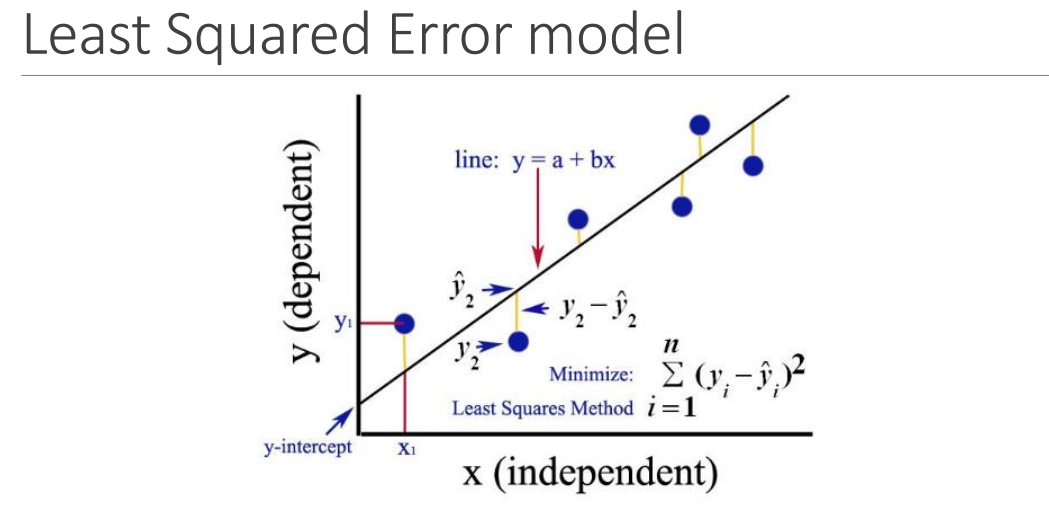

 # Step - 1 Data Ingestion  

In [2]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


 # Profit ~ Rnd
 # Profit_pred = B0 + B1*Rnd
 ## Least Square error model 

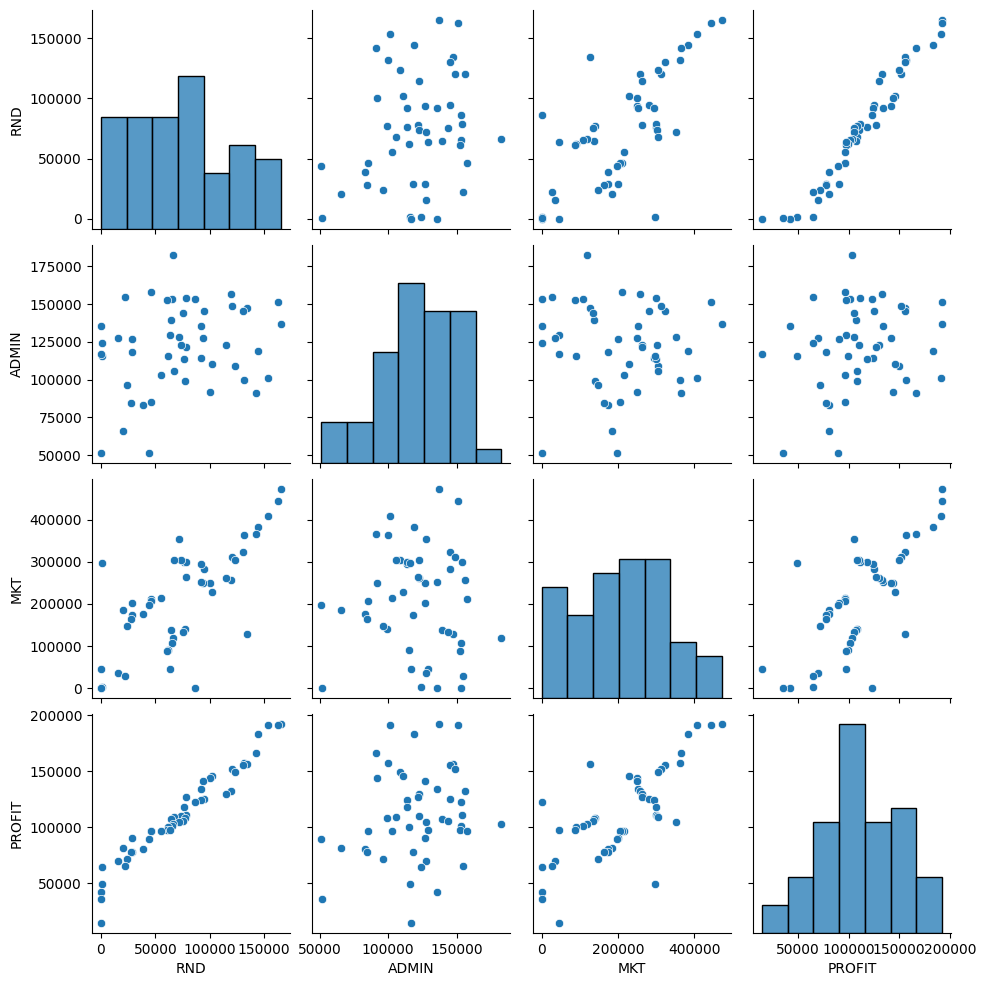

In [4]:
import seaborn as sns
sns.pairplot(df)

 ### Step - 2 Perform basic data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Seperate X(RND) and Y(PROFIT)

In [8]:
X = df[["RND"]]
Y = df[["PROFIT"]]

In [9]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [10]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 4 - Build the Linear Regression model

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

### PROFIT = B0 + B1*RND
### B0 - Intercept
### B1 - Slope / Coefficient

In [15]:
model.intercept_

array([49032.89914125])

In [16]:
model.coef_

array([[0.85429137]])


### PROFIT_pred = 49032.9 + 0.8542*RND
### If RND increases by 1 unit Profit will increase by 0.8542
### If RND budget is 0 the profit is 49032.9 on an average

### Step - 5 Model Evaluation

In [17]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [18]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [19]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [20]:
def evaluate_model(model,x,y):
    # predict result on x
    ypred = model.predict(x)

    # Evaluate ll metrics

    rmse = root_mean_squared_error(y,ypred)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    r2 = r2_score(y,ypred)

    # print above result

    print(f"RMSE:{rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 score : {r2:.2%}")



In [21]:
evaluate_model(model,X,Y)

RMSE:9226.10
MAE : 6910.98
MAPE : 11.07%
R2 score : 94.65%


### From above R2 score > 80% hence model is good

### Visualizing straight Line fit

<Axes: xlabel='RND', ylabel='PROFIT'>

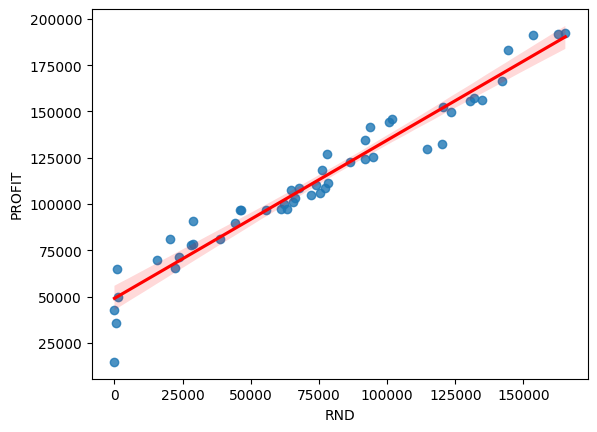

In [22]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color": "red"})

### Step 6 : out of sample prediction

In [24]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [25]:
rnd = 30_000
pred = model.predict([[rnd]])
pred

array([[74661.64026942]])